In [2]:
# Setup

#try:
  #import gempy as gp
  #import gempy_viewer as gpv
  
#except:
  #print("Its not downloaded yet, downloading now")
  #!pip install gempy
  #!pip install gempy_viewer
  

import gempy as gp
import pyvista as pv


In [3]:
# Path to input data
data_path = "https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/"
path_to_data = data_path + "/data/input_data/video_tutorials_v3/"

In [4]:
# Create instance of geomodel
geo_model = gp.create_geomodel(
    project_name = 'test_model',
    extent=[0,2500,0,1000,0,1000],
    resolution=[100,40,40],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_to_data + "tutorial_model_orientations.csv",
        path_to_surface_points =  path_to_data + "tutorial_model_surface_points.csv"
    )
)

Surface points hash:  7c6d3e04ab03a4b8324d9c91d56c30f9e6a7cb6c22c6f2ee69a5dd001c63337a
Orientations hash:  63e42d294dec66b4db2f175bc7b58553ee89d68f3072d36402963c90b0ef5262


In [6]:
# Display basic cross section of input data
pv.plot_2d(geo_model)

AttributeError: module 'pyvista' has no attribute 'plot_2d'

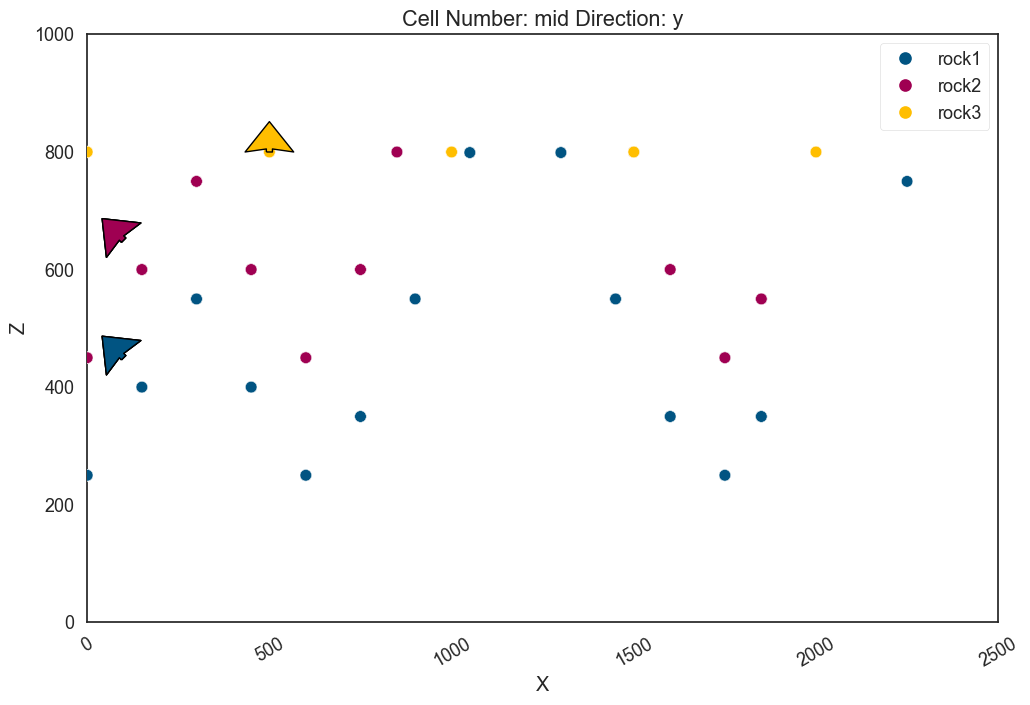

In [6]:
# Manually add a surface point
gp.add_surface_points(
    geo_model = geo_model,
    x = [2250],
    y = [500],
    z = [750],
    elements_names=['rock1']
);

# Show added point
gpv.plot_2d(geo_model)

In [7]:
# View structural frame
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock1,
	color=#015482,
	is_active=True
),
Element(
	name=rock2,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock3,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [8]:
# View structural elements
geo_model.structural_frame.structural_elements

[Element(
 	name=rock1,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=rock2,
 	color=#9f0052,
 	is_active=True
 ),
 Element(
 	name=rock3,
 	color=#ffbe00,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#728f02,
 	is_active=True
 )]

In [9]:
# Define structural groups and age/stratigraphic relationship
# Since the rock1 and rock2 are stacked parallel or semi parallel so it will go together
# While rock3 erode the underlying structural elements, creating unconformity
# making rock 3 have its own section
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
        "Strat_series_2" : ("rock3"),
        "Strat_series_1" : ("rock2", "rock1") # Make sure to place the newer rock first to the oldest or deepest one
    }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_series_2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock3,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_series_1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock2,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock1,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [10]:
# Compute a solution for the model
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 7 chunks
Chunking done: 30 chunks


Solutions(4 Octree Levels, 3 DualContouringMeshes)

C:\Users\dafiq\anaconda3\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


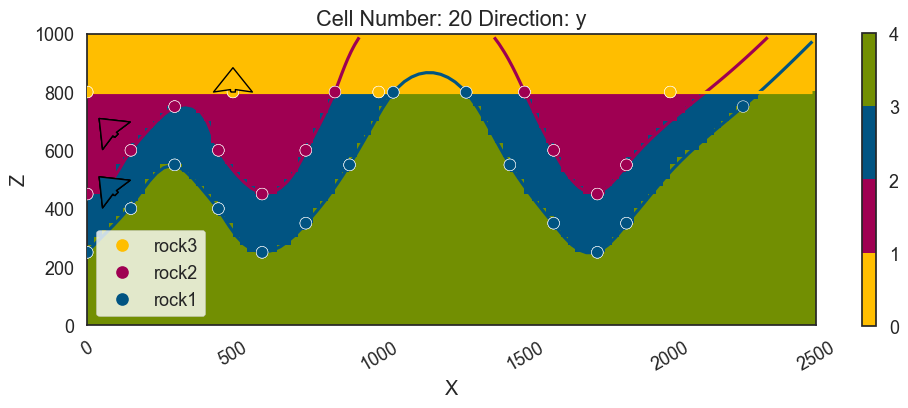

In [11]:
# Display the result in 2d section
gpv.plot_2d(geo_model, cell_number=20)

In [12]:
# Some of example of how to access results
print(f"This is the structural element by ID : {geo_model.solutions.raw_arrays.lith_block}")
print(f"This is the Coordinate of grid points: {geo_model.grid.regular_grid.values}")
print(f"This is the Corresponding scalar fields values for each structural group: {geo_model.solutions.raw_arrays.scalar_field_matrix[1]}")

This is the structural element by ID : [4 4 4 ... 1 1 1]
This is the Coordinate of grid points: [[  12.5   12.5   12.5]
 [  12.5   12.5   37.5]
 [  12.5   12.5   62.5]
 ...
 [2487.5  987.5  937.5]
 [2487.5  987.5  962.5]
 [2487.5  987.5  987.5]]
This is the Corresponding scalar fields values for each structural group: [-0.1160665  -0.11530741 -0.11445189 ... -0.12310825 -0.11725058
 -0.11148229]


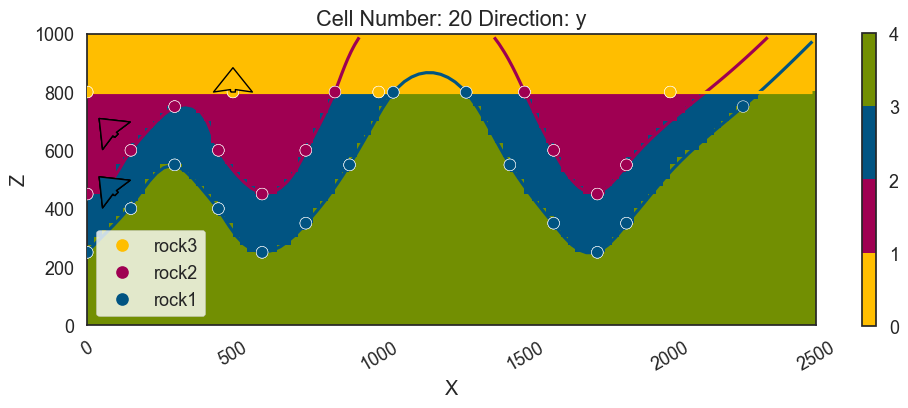

In [13]:
import gempy_viewer as gpv
gpv.plot_2d(geo_model, cell_number=20)

In [14]:
# Create custom section lines
gp.set_section_grid(
    grid= geo_model.grid,
    section_dict= {
        "section1" : ([0,0], [2500,1000], [100,50]),
        "section2" : ([1000,1000], [1500,0], [100,1001])
    }
)

Active grids: GridTypes.DENSE|SECTIONS|NONE


,start,stop,resolution,dist
section1,"[0, 0]","[2500, 1000]","[100, 50]",2692.582404
section2,"[1000, 1000]","[1500, 0]","[100, 1001]",1118.033989


C:\Users\dafiq\anaconda3\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:202: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.fig.show()


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

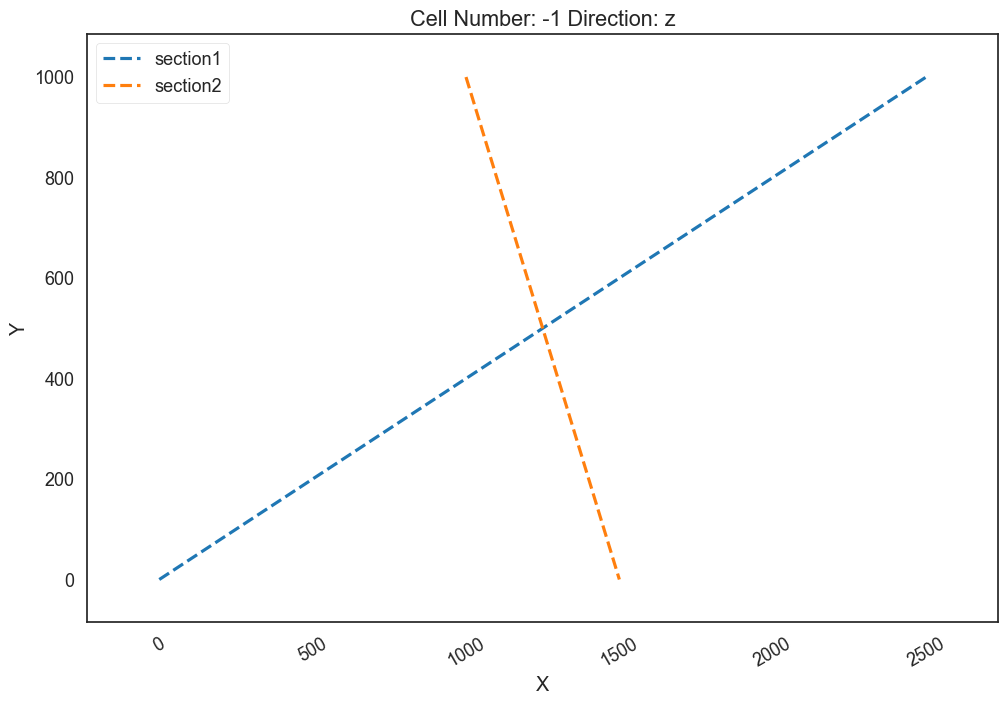

In [15]:
# Show the custom cross section traces
gpv.plot_section_traces(geo_model)

In [16]:
# Recompute the model as a new grid was added!
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 11 chunks
Chunking done: 49 chunks


Solutions(4 Octree Levels, 3 DualContouringMeshes)

C:\Users\dafiq\anaconda3\Lib\site-packages\gempy_viewer\API\_plot_2d_sections_api.py:106: UserWarning: Section contacts not implemented yet. We need to pass scalar field for the sections grid
  warnings.warn(
C:\Users\dafiq\anaconda3\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


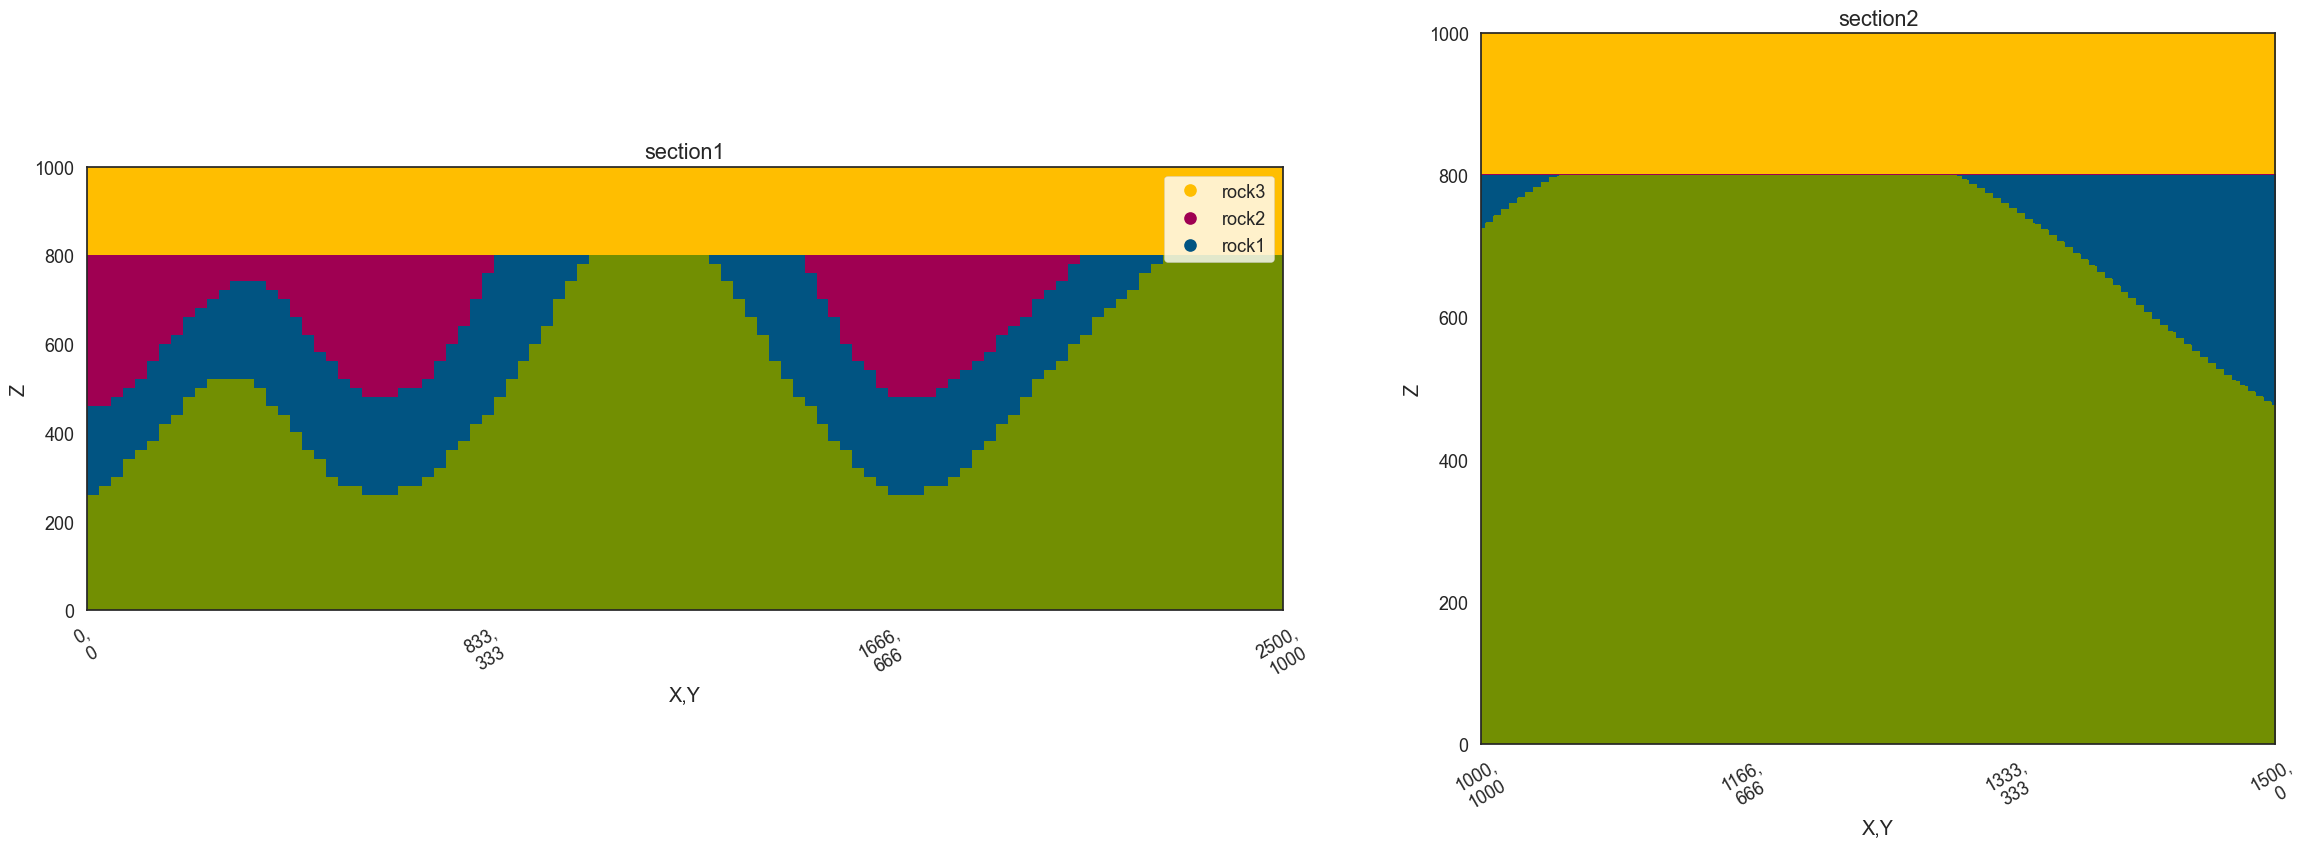

In [17]:
# Display custom cross section
gpv.plot_2d(geo_model, section_names= ['section1', 'section2'], show_data=False)

In [25]:

gpv.plot_3d(geo_model, n_surfaces=4)


AttributeError: 'RawArraysSolution' object has no attribute 'n_surfaces'